In [1]:
from newspaper import Article
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/jandogonzales/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Scrape the NYTimes for scraping article
article = Article('https://www.nytimes.com/2020/05/10/us/ahmaud-arbery-georgia.html')
print('Article')
print(article)

# decoding using specific language EN, ES
article2 = Article('https://www.nytimes.com/2020/05/10/us/ahmaud-arbery-georgia.html', 'en')
print('Article 2')
print(article2)

# MTB Project article
mtb_article = Article('https://www.mtbproject.com/trail/285392/tunnel-otero-west-figure-8')
print('MTB Article')
print(mtb_article)

Article
Article 2
MTB Article


In [3]:
# parse the articles using methods
article.download()
article.parse()

# parse the mtb articles
mtb_article.download()
mtb_article.parse()

In [4]:
article.html
article.authors
article.publish_date
article.text

# mtb article metadata
mtb_article.html
mtb_article.authors
mtb_article.publish_date
mtb_article.text

'A sweet singletrack ride in a pion forest, following ridges and canyons and contouring along hillsides. All the trails used on this ride offer their own challenges in the form of grinding climbs, ledges, baby heads, tight spots between trees and of course flowing banked corners and jumps.\n\n\n\nThis trail system can be busy on a nice weekend and it can be accessed by several different parking areas so what you see in the lot might not be representative of how many people will be out.\n\nThis ride butts up against the military withdrawal area of Kirtland Air Force Base. Be careful not to cross onto their land, it is posted poorly, almost as if they want you to make a mistake and end up in their domain.\n\nStart up the Tunnel Canyon Trail, which climbs gradually to start, then leads to some steeper bits and a ledge here or there. Make a turn through the bottom of the canyon and start to climb the other side more steeply. Once you make it through the steep grunt, things mellow out for t

In [5]:
from nltk.tokenize import RegexpTokenizer
from typing import List
import nltk

# mtb article text parsing
mtb_text = mtb_article.text

# tokenize words using NLTK tokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenWords: List[str] = list(tokenizer.tokenize(mtb_text))
print("Token words:")
# print(tokenWords)
print(len(tokenWords))

# stop words from the mtb text
stopWords = nltk.corpus.stopwords.words("english")
filterWords = [w for w in tokenWords if w not in stopWords]
print("Filter words:")
print(len(filterWords))

Token words:
838
Filter words:
449


In [6]:
# freq dist for common words in the filtered words
fd = nltk.FreqDist(filterWords)
print("Filter words main:")
fd.most_common(10)
fd.tabulate(10)

# find freq dist of words outside of case
lower_fd = nltk.FreqDist([w.lower() for w in filterWords])
print("Filter words lower:")
fd.most_common(10)
fd.tabulate(10)

Filter words main:
 climb  Trail  trail   make  Ridge  right   left ledges  trees Canyon 
    12     10      9      6      6      6      6      5      5      5 
Filter words lower:
 climb  Trail  trail   make  Ridge  right   left ledges  trees Canyon 
    12     10      9      6      6      6      6      5      5      5 


In [7]:
# use concordance to see the relations between words, location/context
# print(mtb_text)
from pprint import pprint
mtbTokenize = nltk.word_tokenize(mtb_text)
print("MTB Tokenize using NLTK:")
print(type(mtbTokenize))
print("\n")

# put mtb text in nltk format
mtbText = nltk.Text(mtbTokenize)
print(type(mtbText))
print(mtbText)
print("\n")

# use concordance to find locations and context of a word
print("MTB NLTK Concordance:")
mtbText.concordance("trail", lines=5)
print("\n")

# list of concordance words
concordance_list = mtbText.concordance_list("trail", lines=5)
for entry in concordance_list:
    print(entry.line)
    print("\n")

MTB Tokenize using NLTK:
<class 'list'>


<class 'nltk.text.Text'>
<Text: A sweet singletrack ride in a pion forest...>


MTB NLTK Concordance:
Displaying 5 of 17 matches:
wing banked corners and jumps . This trail system can be busy on a nice weekend
 domain . Start up the Tunnel Canyon Trail , which climbs gradually to start , 
Trail.Turn right onto the West Ridge Trail and immediately start climbing again
k.At the top of the climb there is a trail junction on the right , take note , 
mb you are rewarded with fast smooth trail snaking through the trees and the oc


wing banked corners and jumps . This trail system can be busy on a nice weekend


 domain . Start up the Tunnel Canyon Trail , which climbs gradually to start , 


Trail.Turn right onto the West Ridge Trail and immediately start climbing again


k.At the top of the climb there is a trail junction on the right , take note , 


mb you are rewarded with fast smooth trail snaking through the trees and the oc




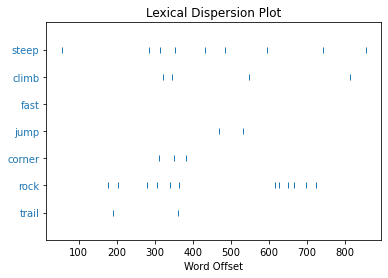

In [8]:
# collocations - series of words that frequently appear together in text

# Dispersion plot of particular MTB words per article and how often they occur
# Helps show what words are near each other in chrono order
mtbText.dispersion_plot(
    ["trail", "rock", "corner", "jump", "fast", "climb", "steep"]
)

In [9]:
# Frequency distribution for MTB Text
from nltk import FreqDist
frequency_distribution = FreqDist(mtbText)
print(frequency_distribution)

# find the X most common words in the mtb text
X = 20
frequency_distribution.most_common(20)

<FreqDist with 347 samples and 883 outcomes>


[('the', 69),
 ('and', 37),
 ('.', 29),
 ('a', 26),
 ('of', 22),
 (',', 20),
 ('to', 20),
 ('you', 16),
 ('is', 14),
 ('on', 13),
 ('climb', 12),
 ('in', 11),
 ('trail', 9),
 ('through', 9),
 ('with', 9),
 ('Trail', 8),
 ('up', 7),
 ('this', 6),
 ('be', 6),
 ('make', 6)]

In [10]:
# let's tokenize the main MTB Text NTLK object and run filters
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# create set of stop words to filter the text with
stop_words = set(stopwords.words("english"))
mtbFilteredWords = [
    word for word in mtbText if word.casefold() not in stop_words
]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jandogonzales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# let's run frequency distribution on filtered words
print("MTB Filtered Words:");
print(len(mtbFilteredWords))

# freq dist on the filtered words
X = 20
freqDist = FreqDist(mtbFilteredWords)
print("Freq dist:")
print(freqDist)
freqDist.most_common(X)

MTB Filtered Words:
479
Freq dist:
<FreqDist with 267 samples and 479 outcomes>


[('.', 29),
 (',', 20),
 ('climb', 12),
 ('trail', 9),
 ('Trail', 8),
 ('make', 6),
 ('Ridge', 6),
 ('right', 6),
 ('left', 6),
 ('ledges', 5),
 ('trees', 5),
 ('Canyon', 5),
 ('start', 5),
 ("'ll", 5),
 ('West', 5),
 ('ride', 4),
 ('area', 4),
 ('onto', 4),
 ('turn', 4),
 ('things', 4)]

In [18]:
# create feature vector slice for analysis
feature_vector = list(freqDist)
print(len(feature_vector))
print(feature_vector)

267
['.', ',', 'climb', 'trail', 'Trail', 'make', 'Ridge', 'right', 'left', 'ledges', 'trees', 'Canyon', 'start', "'ll", 'West', 'ride', 'area', 'onto', 'turn', 'things', 'willou', 'rock', 'steps', 'back', 'baby', 'banked', 'Tunnel', 'canyon', 'side', 'junction', 'get', 'top', 'fast', 'sharp', 'couple', 'section', 'downhill', 'turns', 'one', 'great', 'sweet', 'along', 'trails', 'climbs', 'spots', 'flowing', 'jumps', 'nice', 'cross', 'almost', 'end', 'gradually', 'bits', 'bottom', 'steep', 'climbing', 'loose', 'initial', 'gardens', 'though', 'nothing', 'winding', 'head', 'twisting', 'KAFB', 'boundary', 'rocks', 'jump', 'Otero', 'offers', '2', 'way', 'dip', 'difficult', 'car', 'hairpins', 'singletrack', 'pion', 'forest', 'following', 'ridges', 'canyons', 'contouring', 'hillsides', 'used', 'offer', 'challenges', 'form', 'grinding', 'heads', 'tight', 'course', 'corners', 'system', 'busy', 'weekend', 'accessed', 'several', 'different', 'parking', 'areas', 'see', 'lot', 'might', 'representat

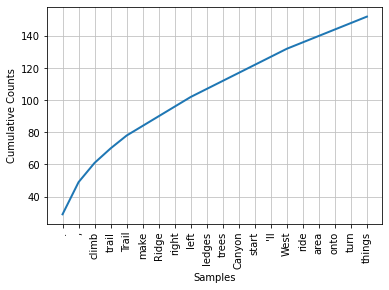

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [12]:
# frequency dist plot from text
freqDist.plot(X, cumulative=True)

In [13]:
# Collocations - sequence of words that juxtapose each other
# and that also show up often in particular text
# Examples of collocations that use the word "tree":
# 1. Syntax tree
# 2. Family tree
# 3. Decision tree
mtbText.collocations()

West Ridge; willou 'll; Tunnel Canyon; Ridge Trail; KAFB boundary;
rock gardens; Canyon Trail; Otero Canyon; banked turns; initial climb;
right onto; trail junction


In [14]:
# Lemmatization - process of grouping words with different inflected forms
# of a word so they can be analyzed together. Brings context.
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in mtbText]
print(lemmatized_words)

['A', 'sweet', 'singletrack', 'ride', 'in', 'a', 'pion', 'forest', ',', 'following', 'ridge', 'and', 'canyon', 'and', 'contouring', 'along', 'hillside', '.', 'All', 'the', 'trail', 'used', 'on', 'this', 'ride', 'offer', 'their', 'own', 'challenge', 'in', 'the', 'form', 'of', 'grinding', 'climb', ',', 'ledge', ',', 'baby', 'head', ',', 'tight', 'spot', 'between', 'tree', 'and', 'of', 'course', 'flowing', 'banked', 'corner', 'and', 'jump', '.', 'This', 'trail', 'system', 'can', 'be', 'busy', 'on', 'a', 'nice', 'weekend', 'and', 'it', 'can', 'be', 'accessed', 'by', 'several', 'different', 'parking', 'area', 'so', 'what', 'you', 'see', 'in', 'the', 'lot', 'might', 'not', 'be', 'representative', 'of', 'how', 'many', 'people', 'will', 'be', 'out', '.', 'This', 'ride', 'butt', 'up', 'against', 'the', 'military', 'withdrawal', 'area', 'of', 'Kirtland', 'Air', 'Force', 'Base', '.', 'Be', 'careful', 'not', 'to', 'cross', 'onto', 'their', 'land', ',', 'it', 'is', 'posted', 'poorly', ',', 'almost'

In [15]:
# create new NLTK Text using lemmatized words
new_mtb_text = nltk.Text(lemmatized_words)

# new collocations on lemmatized words
new_mtb_text.collocations()

# New lemmas brought up new collocations
# 1. baby head - baby head rocks
# 2. rock garden - common mtb term

# This is how we find most common word combos to see what
# people are talking about and how they talk about it

West Ridge; willou 'll; Tunnel Canyon; Ridge Trail; KAFB boundary;
Canyon Trail; Otero Canyon; baby head; rock garden; climb gradually;
initial climb; banked turn; right onto; trail junction


In [6]:
# article NYTimes NLP
article.nlp()
article.summary

# MTB article NLP
mtb_article.nlp()
mtb_article.summary

"Start up the Tunnel Canyon Trail, which climbs gradually to start, then leads to some steeper bits and a ledge here or there.\nThe trail eventually drops down into Otero Canyon Take a left on the Otero Canyon Trail and head downhill.\nSome of the steps are quite large including one in the middle of the climb and one just before you reach the West Ridge .\nAt the top of the climb you willou'll make a very sharp turn to the right onto the Birdhouse Ridge Trail.\nThen the trail enters the trees again for the last twisting bit before you pop out onto the Tunnel Canyon Trail less than 100 yards from your car."

In [7]:
# article keywords from NLP
article.keywords
mtb_article.keywords

['canyon',
 'climb',
 'bike',
 'right',
 'trail',
 'ridge',
 'steps',
 'start',
 'trees',
 'figure',
 'mexico',
 'carnuel',
 'left',
 'tunnel',
 'west',
 'mountain',
 'otero']

In [12]:
# Easter eggs
# hot() - returns a list of top trending terms on Goole using API
# popular_urls() - returns list of popular news source urls
import newspaper
newspaper.hot()

['Lakers',
 'Arsenal',
 'Vida Blue',
 'Ed Sheeran',
 'James Harden',
 'West Ham vs Man United',
 'Anthony Davis',
 'Wyndham Clark',
 "D'Angelo Russell",
 'Stephen Curry',
 'Klay Thompson',
 'Patrick Mahomes',
 'Troyes  PSG',
 'John Hao',
 'Elizabeth Holmes',
 "Sean O'Malley",
 'Nashville weather',
 'Boxing',
 'Golden Knights',
 'Allen, Texas']

In [13]:
newspaper.popular_urls()

['http://www.huffingtonpost.com',
 'http://cnn.com',
 'http://www.time.com',
 'http://www.ted.com',
 'http://pandodaily.com',
 'http://www.cnbc.com',
 'http://www.mlb.com',
 'http://www.pcmag.com',
 'http://www.foxnews.com',
 'http://theatlantic.com',
 'http://www.bbc.co.uk',
 'http://www.vice.com',
 'http://www.elle.com',
 'http://www.vh1.com',
 'http://espnf1.com',
 'http://espn.com',
 'http://www.npr.org',
 'http://www.sfgate.com',
 'http://www.glamour.com',
 'http://www.whosdatedwho.com',
 'http://kotaku.com',
 'http://thebostonchannel.com',
 'http://www.suntimes.com',
 'http://www.businessinsider.com',
 'http://www.rivals.com',
 'http://thebusinessjournal.com',
 'http://www.newrepublic.com',
 'http://allthingsd.com',
 'http://www.topgear.com',
 'http://thecitizen.com',
 'http://www.ign.com',
 'http://www.sci-news.com',
 'http://www.morningstar.com',
 'http://www.variety.com',
 'http://thebottomline.as.ucsb.edu',
 'http://www.gamefaqs.com',
 'http://blog.searchenginewatch.com',
 'h

mtb_article.keywords()

In [15]:
mtb_article.keywords

['canyon',
 'climb',
 'bike',
 'right',
 'trail',
 'ridge',
 'steps',
 'start',
 'trees',
 'figure',
 'mexico',
 'carnuel',
 'left',
 'tunnel',
 'west',
 'mountain',
 'otero']

In [16]:
trailforks = Article('https://www.trailforks.com/region/albuquerque/trails/')

In [17]:
# trailforks.download()
# trailforks.parse()

ArticleException: Article `download()` failed with 403 Client Error: Forbidden for url: https://www.trailforks.com/region/albuquerque/trails/ on URL https://www.trailforks.com/region/albuquerque/trails/